Copyright (c) 2022 Mayur Khandetod

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Abstract:

Aim: To develop a prediction model that can determine whether a patient has lung cancer based on a set of risk indicators.

Description of data set: This dataset contains a List of Risk Factors for Lung Cancer. Based on the input values listed below, this dataset is used to forecast if a patient is likely to get lung cancer. Each row of data in the table contains pertinent information about the patient.

Description of fields: • Gender: 1(male), 0(female) • Age: Age of the patient • Smoking: YES=2 , NO=1. • Yellow fingers: YES=2 , NO=1. • Anxiety: YES=2 , NO=1. • Peer_pressure: YES=2 , NO=1. • Chronic Disease: YES=2 , NO=1. • Fatigue: YES=2 , NO=1. • Allergy: YES=2 , NO=1. • Wheezing: YES=2 , NO=1. • Alcohol: YES=2 , NO=1. • Coughing: YES=2 , NO=1. • Shortness of Breath: YES=2 , NO=1. • Swallowing Difficulty: YES=2 , NO=1. • Chest pain: YES=2 , NO=1. • Lung Cancer: YES=2 , NO=1.

Imported required libraries and train, test dataset. Import dataset using pandas. Observed dataset and perform data checking. Split the data in training and test sets. Set the features and target. Train model using Logistic Regression, XGBoost and AutoML. Performed Shap analysis and plotted beeswarm, shap summary for all models to find model interpretability.

# Loading Libraries

In [2]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reads csv and stores dataset as dataframe
lung_df=pd.read_csv("https://raw.githubusercontent.com/MayurAvinash/DESM_INFO6105/main/surveylungcancer.csv")

# Data Checking

In [4]:
#displays first 10 rows of dataset
lung_df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
5,1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
9,0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [5]:
#displays information about the dataset
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC_DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL_CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS_OF_BREATH    55394 non-null  int64
 13  SWALLOWING_DIFFICULTY  55394 non-null  int64
 14  CHEST_PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [6]:
#displays information about numerical columns only
lung_df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
lung_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

# Splitting the data into training and validation dataset

In [8]:
y= lung_df.LUNG_CANCER

In [9]:
x=lung_df.drop('LUNG_CANCER',axis=1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Linear Model Building using Logistic Regression

In [11]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [12]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
CHEST_PAIN,0.029985
GENDER,0.029140
ANXIETY,0.023785
CHRONIC_DISEASE,0.022186
SWALLOWING_DIFFICULTY,0.009235
WHEEZING,0.009212
FATIGUE,0.008930
SHORTNESS_OF_BREATH,0.005880
AGE,-0.000456
ALLERGY,-0.000704


**Converting above log odd coefficients to regular odds:**

1. Fit a linear model and interpret the regression coefficients

Ans: When the variable CHEST_PAIN is increased by one unit, the odds of having lung cancer in the target class ("2") increase by more than 1x (i.e. 1.030) compared to the odds of not having lung cancer in the target class. In contrast, as PEER PRESSURE concentration rises by one unit, the chances of lung cancer in the target class rise by only 0.949.

In [13]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
CHEST_PAIN,1.030439
GENDER,1.029568
ANXIETY,1.024070
CHRONIC_DISEASE,1.022434
SWALLOWING_DIFFICULTY,1.009278
WHEEZING,1.009254
FATIGUE,1.008970
SHORTNESS_OF_BREATH,1.005897
AGE,0.999544
ALLERGY,0.999297


# Tree-based Model Building using XGBoost

In [14]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier()

In [15]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))

0.5003159129885368


2. Fit a tree-based model and interpret the nodes

Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'AGE'. Node interpretability for first 3 trees is shown below.

In [53]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

**2nd tree plotted with the XGBoost algorithm:**

In [54]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

**3rd tree plotted with the XGBoost algorithm:**

In [55]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

# Using Auto ML to find the best model

In [17]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 16 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=9268184bcb2daea68ab9181e7075ee5442e6c7400c08b387be73a975a8aad283
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [18]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [19]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [20]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [21]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:52527 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6e7tjtr2
  JVM stdout: /tmp/tmp6e7tjtr2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6e7tjtr2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:52527
Connecting to H2O server at http://127.0.0.1:52527 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_ukptt1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
# Import the processed data from notebook One
#from google.colab import files
#file = files.upload()
url = "https://raw.githubusercontent.com/MayurAvinash/DESM_INFO6105/main/surveylungcancer.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
df.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [24]:
df.types

{'AGE': 'int',
 'ALCOHOL_CONSUMING': 'int',
 'ALLERGY': 'int',
 'ANXIETY': 'int',
 'CHEST_PAIN': 'int',
 'CHRONIC_DISEASE': 'int',
 'COUGHING': 'int',
 'FATIGUE': 'int',
 'GENDER': 'int',
 'LUNG_CANCER': 'int',
 'PEER_PRESSURE': 'int',
 'SHORTNESS_OF_BREATH': 'int',
 'SMOKING': 'int',
 'SWALLOWING_DIFFICULTY': 'int',
 'WHEEZING': 'int',
 'YELLOW_FINGERS': 'int'}

In [25]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].asfactor()
print(df['LUNG_CANCER'].isfactor())

[True]


In [26]:
df.describe()

Rows:55394
Cols:16




,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,0.502003827129292,44.137614182041325,1.4995306350868336,1.4962992381846407,1.5006137848864498,1.4967686030978076,1.5010470448062982,1.4979239628840675,1.5019135646459905,1.5010650973029576,1.4984474852872165,1.5050546990648797,1.500758204859733,1.49996389500668,1.5016427771960865,
maxs,1.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
sigma,0.5000004978097399,15.309217494376208,0.5000042928798124,0.4999908172360575,0.5000041364498418,0.49999407105604166,0.5000034168713465,0.5000002031976855,0.5000008514091558,0.5000033787414793,0.5000021028557717,0.49997896231916983,0.5000039383051423,0.5000045118816887,0.5000018144367121,
zeros,27586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.0,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1
2,1.0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2


In [27]:
df.shape

(55394, 16)

In [28]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [29]:
print(df_train.shape)
print(df_test.shape)

(44246, 16)
(11148, 16)


In [30]:
df_train.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,61,2,2,2,2,2,2,1,2,1,2,2,2,1,1
0,72,1,1,1,1,2,2,2,2,2,2,2,1,2,1
1,60,2,1,1,1,1,2,1,1,1,1,2,1,1,2


In [31]:
# Set the features and target
X=df.columns
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [32]:
# Set target and predictor variables
y ='LUNG_CANCER'
#y_numeric ='churn_bit'
X.remove(y) 
#X.remove(y_numeric) 
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']


In [33]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [34]:
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220424_221606_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,22.0,22.0,17922.0,0.0,16.0,0.818182,1.0,1299.0,60.090908




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.2484235013949058
RMSE: 0.49842100817973733
LogLoss: 0.6899903043529592
Mean Per-Class Error: 0.4950807048570695
AUC: 0.576582440561056
AUCPR: 0.5627033266974563
Gini: 0.15316488112211202

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46662366069121664: 


,,1,2,Error,Rate
0,1,320.0,22034.0,0.9857,(22034.0/22354.0)
1,2,98.0,21794.0,0.0045,(98.0/21892.0)
2,Total,418.0,43828.0,0.5002,(22132.0/44246.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.466624,0.663238,201.0
1,max f2,0.454735,0.830658,208.0
2,max f0point5,0.487193,0.561876,146.0
3,max accuracy,0.496271,0.553722,102.0
4,max precision,0.532981,0.710000,2.0
5,max recall,0.411278,1.000000,210.0
6,max specificity,0.537127,0.999553,0.0
7,max absolute_mcc,0.492191,0.107551,124.0
8,max min_per_class_accuracy,0.495525,0.516954,103.0
9,max mean_per_class_accuracy,0.496271,0.553079,102.0



Gains/Lift Table: Avg response rate: 49.48 %, avg score: 49.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011617,0.524080,1.388034,1.388034,0.686770,0.529221,0.686770,0.529221,0.016125,0.016125,38.803418,38.803418,0.008922
1,2,0.020748,0.520516,1.305713,1.351806,0.646040,0.521456,0.668845,0.525804,0.011922,0.028047,30.571297,35.180568,0.014447
2,3,0.030353,0.518851,1.303017,1.336366,0.644706,0.520006,0.661206,0.523969,0.012516,0.040563,30.301738,33.636634,0.020208
3,4,0.040953,0.516949,1.297126,1.326210,0.641791,0.517650,0.656181,0.522333,0.013749,0.054312,29.712619,32.620981,0.026442
4,5,0.055779,0.515522,1.223137,1.298813,0.605183,0.516076,0.642626,0.520670,0.018134,0.072447,22.313739,29.881293,0.032991
5,6,0.101026,0.510231,1.184193,1.247478,0.585914,0.512258,0.617226,0.516903,0.053581,0.126028,18.419307,24.747759,0.049487
6,7,0.151245,0.507064,1.154267,1.216528,0.571107,0.508429,0.601913,0.514089,0.057966,0.183994,15.426664,21.652799,0.064821
7,8,0.210641,0.504349,1.115914,1.188157,0.552131,0.505294,0.587876,0.511609,0.066280,0.250274,11.591375,18.815736,0.078448
8,9,0.300027,0.500697,1.096660,1.160898,0.542604,0.502448,0.574388,0.508880,0.098027,0.348301,9.665950,16.089755,0.095550
9,10,0.401641,0.497984,1.041120,1.130594,0.515125,0.499111,0.559395,0.506408,0.105792,0.454093,4.112009,13.059428,0.103820




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.25015445250320956
RMSE: 0.500154428655
LogLoss: 0.693453995813756
Mean Per-Class Error: 0.4990848263039714
AUC: 0.5028649134703926
AUCPR: 0.4971348621318755
Gini: 0.0057298269407852764

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41920198653806306: 


,,1,2,Error,Rate
0,1,45.0,22309.0,0.998,(22309.0/22354.0)
1,2,4.0,21888.0,0.0002,(4.0/21892.0)
2,Total,49.0,44197.0,0.5043,(22313.0/44246.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.419202,0.662380,387.0
1,max f2,0.408675,0.830608,391.0
2,max f0point5,0.426568,0.550878,382.0
3,max accuracy,0.531669,0.506712,48.0
4,max precision,0.573040,0.750000,1.0
5,max recall,0.361462,1.000000,399.0
6,max specificity,0.576315,0.999955,0.0
7,max absolute_mcc,0.412077,0.027568,390.0
8,max min_per_class_accuracy,0.495187,0.501142,194.0
9,max mean_per_class_accuracy,0.500875,0.503733,164.0



Gains/Lift Table: Avg response rate: 49.48 %, avg score: 49.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010012,0.541056,1.040207,1.040207,0.514673,0.549663,0.514673,0.549663,0.010415,0.010415,4.020682,4.020682,0.000797
1,2,0.020002,0.534399,1.129440,1.084773,0.558824,0.537274,0.536723,0.543475,0.011283,0.021697,12.944025,8.477312,0.003356
2,3,0.030014,0.530418,0.958085,1.042512,0.474041,0.532240,0.515813,0.539727,0.009593,0.031290,-4.191477,4.251202,0.002526
3,4,0.040004,0.527765,0.946535,1.018545,0.468326,0.529006,0.503955,0.537050,0.009456,0.040745,-5.346506,1.854486,0.001468
4,5,0.050016,0.525547,0.948961,1.004615,0.469526,0.526576,0.497063,0.534953,0.009501,0.050247,-5.103939,0.461544,0.000457
5,6,0.100145,0.518375,0.985949,0.995272,0.487827,0.521652,0.492440,0.528295,0.049424,0.099671,-1.405135,-0.472849,-0.000937
6,7,0.150025,0.513574,0.989031,0.993197,0.489352,0.515815,0.491413,0.524146,0.049333,0.149004,-1.096879,-0.680326,-0.002020
7,8,0.201871,0.510047,1.029054,1.002406,0.509154,0.511736,0.495970,0.520959,0.053353,0.202357,2.905362,0.240584,0.000961
8,9,0.300005,0.503921,1.024051,1.009486,0.506679,0.506840,0.499473,0.516340,0.100493,0.302850,2.405065,0.948598,0.005633
9,10,0.400014,0.499023,0.993424,1.005470,0.491525,0.501514,0.497486,0.512634,0.099351,0.402202,-0.657620,0.547021,0.004331




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.496113,0.009681,0.501130,0.505255,0.480280,0.499604,0.494293
1,auc,0.503595,0.005676,0.498015,0.502648,0.511959,0.506229,0.499127
2,err,0.503888,0.009681,0.498870,0.494745,0.519720,0.500396,0.505707
3,err_count,4459.000000,85.606660,4415.000000,4378.000000,4599.000000,4428.000000,4475.000000
4,f0point5,0.551007,0.009507,0.556058,0.559764,0.535389,0.554535,0.549289
5,f1,0.662467,0.008575,0.667119,0.670182,0.648314,0.665710,0.661010
6,f2,0.830503,0.005314,0.833616,0.834866,0.821607,0.832641,0.829783
7,lift_top_group,1.003022,0.057031,1.056418,1.032880,1.031789,0.914107,0.979913
8,logloss,0.693542,0.000391,0.693924,0.693575,0.692887,0.693601,0.693723
9,max_per_class_error,0.996948,0.001226,0.997515,0.994766,0.997613,0.997297,0.997548



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-24 22:19:43,5.091 sec,0.0,0.499973,0.693093,0.500000,0.494779,1.000000,0.505221
1,,2022-04-24 22:19:43,5.205 sec,5.0,0.498453,0.690055,0.576588,0.562703,1.388034,0.500203
2,,2022-04-24 22:19:43,5.277 sec,10.0,0.498421,0.689990,0.576582,0.562703,1.388034,0.500203
3,,2022-04-24 22:19:43,5.343 sec,15.0,0.498421,0.689990,0.576582,0.562703,1.388034,0.500203
4,,2022-04-24 22:19:44,5.406 sec,20.0,0.498421,0.689990,0.576582,0.562703,1.388034,0.500203
5,,2022-04-24 22:19:44,5.456 sec,22.0,0.498421,0.689990,0.576582,0.562703,1.388034,0.500203



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,174.607895,1.000000,0.452268
1,WHEEZING,58.059643,0.332514,0.150386
2,CHEST_PAIN,55.958530,0.320481,0.144943
3,ALCOHOL_CONSUMING,47.421570,0.271589,0.122831
4,SWALLOWING_DIFFICULTY,36.894516,0.211299,0.095564
5,COUGHING,13.129835,0.075196,0.034009
6,GENDER,0.000000,0.000000,0.000000
7,SMOKING,0.000000,0.000000,0.000000
8,YELLOW_FINGERS,0.000000,0.000000,0.000000
9,ANXIETY,0.000000,0.000000,0.000000


In [35]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20220424_221606_model_1,0.502865,0.693454,0.497135,0.499085,0.500154,0.250154
XGBoost_2_AutoML_1_20220424_221606,0.502809,0.741276,0.496215,0.4998,0.520592,0.271016
GBM_3_AutoML_1_20220424_221606,0.502436,0.695013,0.498341,0.498928,0.500954,0.250955
XGBoost_grid_1_AutoML_1_20220424_221606_model_1,0.502063,0.709578,0.49745,0.499688,0.507737,0.257796
XGBoost_1_AutoML_1_20220424_221606,0.502005,0.740529,0.495461,0.5,0.520412,0.270829
DRF_1_AutoML_1_20220424_221606,0.50129,0.792142,0.494923,0.499448,0.533014,0.284104
XGBoost_3_AutoML_1_20220424_221606,0.501082,0.696549,0.4922,0.499083,0.501711,0.251714
DeepLearning_1_AutoML_1_20220424_221606,0.500024,0.696745,0.491786,0.5,0.501749,0.251752
GBM_2_AutoML_1_20220424_221606,0.500022,0.694097,0.494694,0.499061,0.500509,0.250509
GBM_4_AutoML_1_20220424_221606,0.499998,0.699414,0.495363,0.499106,0.503083,0.253092


In [36]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220424_221606_model_1': 0,
 'GLM_1_AutoML_1_20220424_221606': 18}

In [37]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


3.  Use auto ml to find the best model

Ans: Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has lung cancer. By referring the below variable importance and shap summary plots, we can say that 'AGE' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'ANXIETY' and 'GENDER' according to variable importance and shap summary plots respectively.

In [38]:
best_model.algo

'gbm'

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20220424_221606_model_1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4666236609793538: 


,,1,2,Error,Rate
0,1,320.0,22034.0,0.9857,(22034.0/22354.0)
1,2,98.0,21794.0,0.0045,(98.0/21892.0)
2,Total,418.0,43828.0,0.5002,(22132.0/44246.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

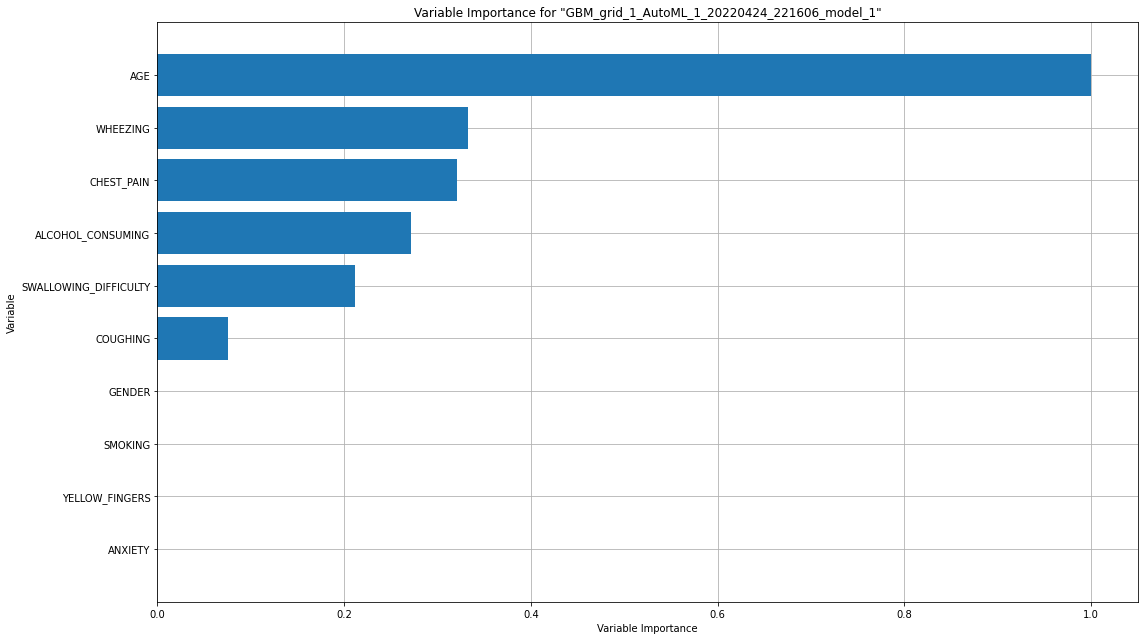

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

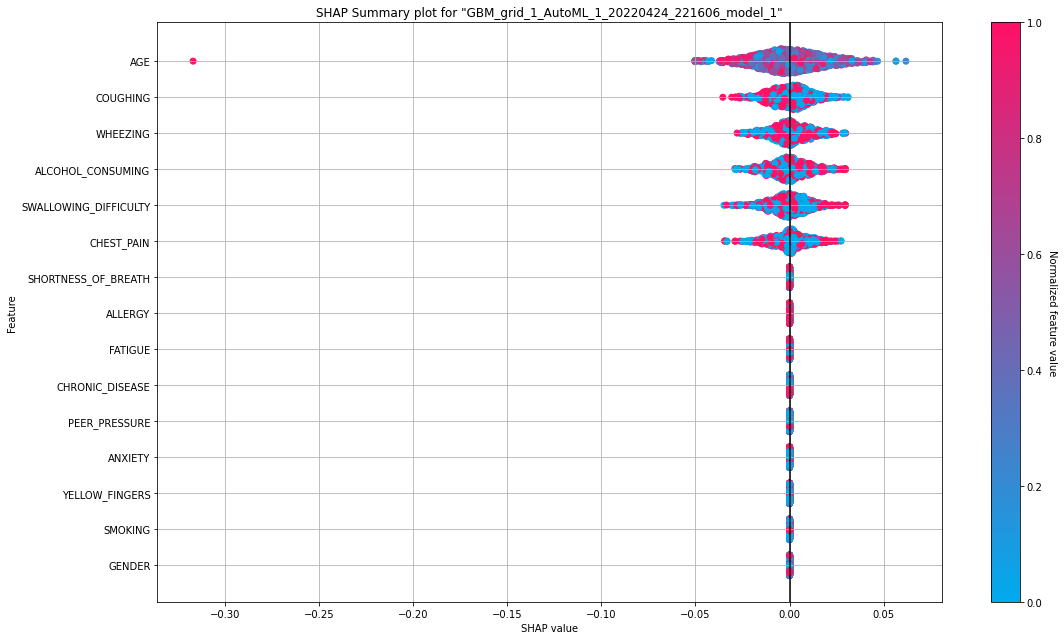

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

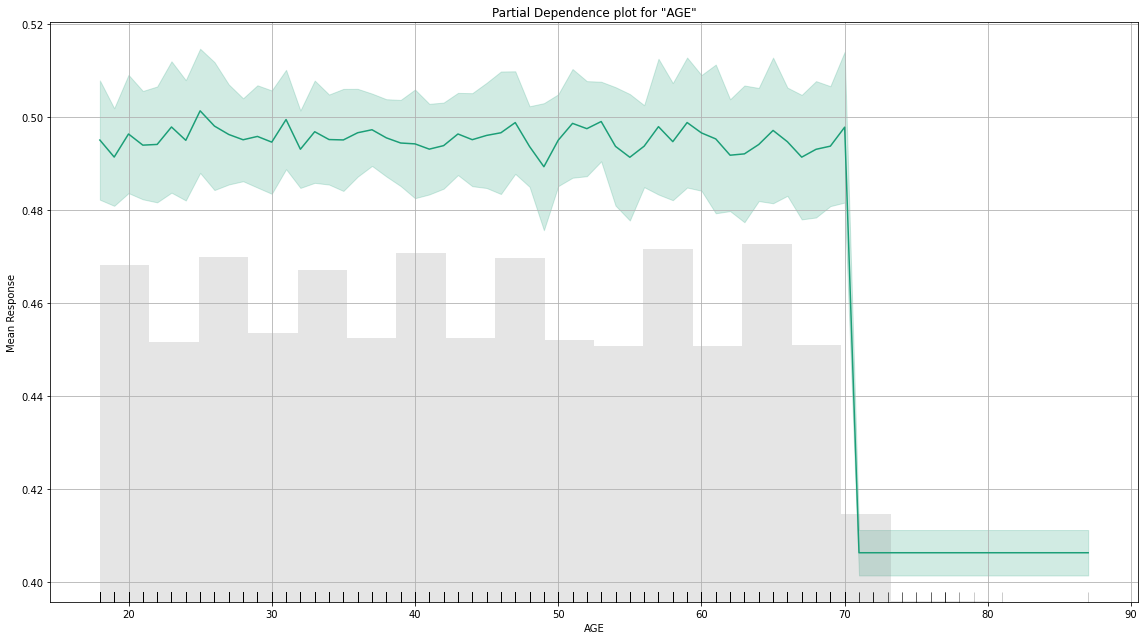

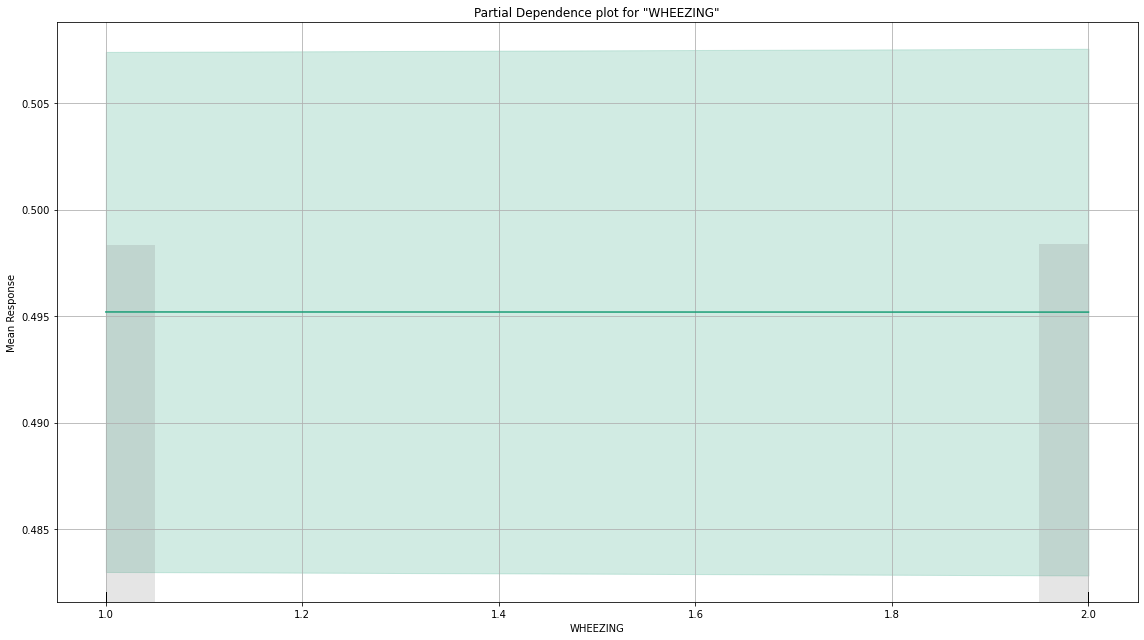

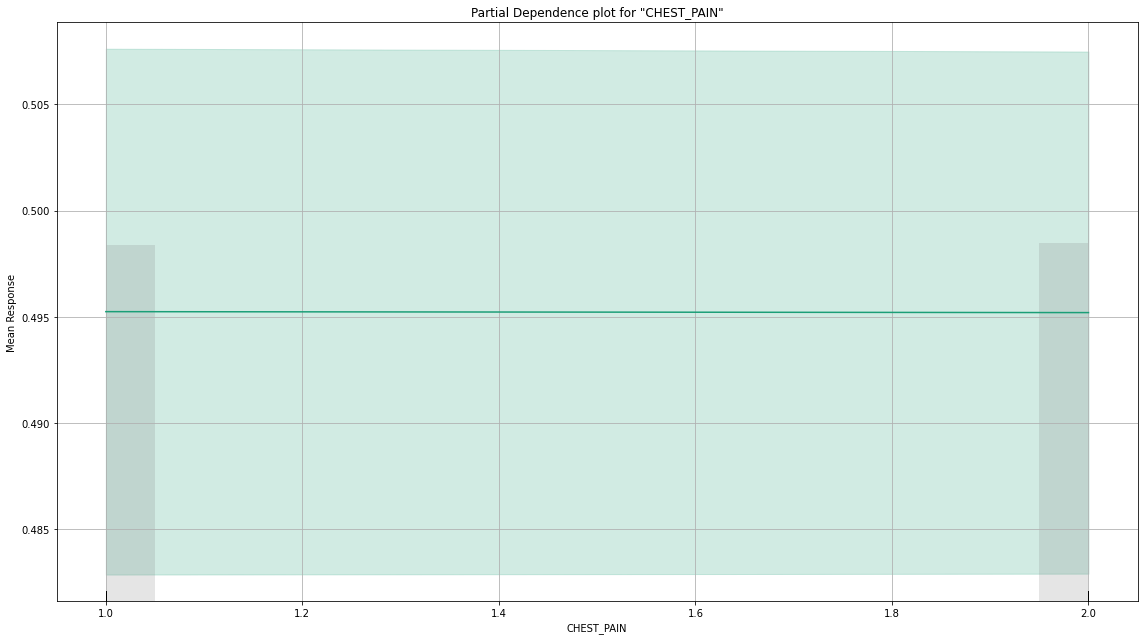

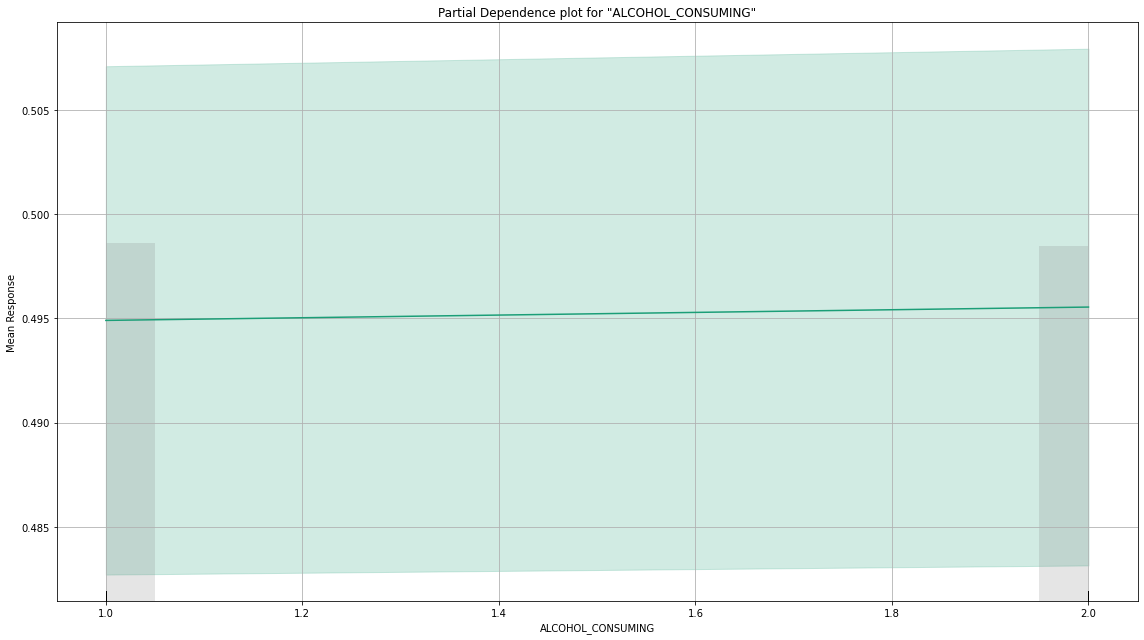

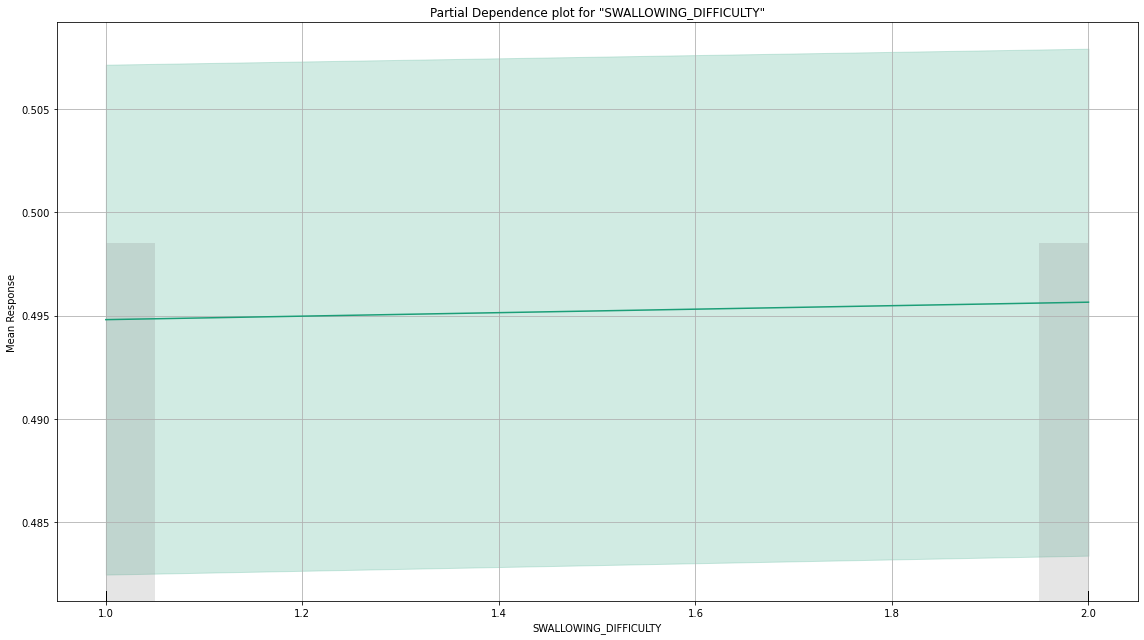

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20220424_221606_model_1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4666236609793538: 


,,1,2,Error,Rate
0,1,320.0,22034.0,0.9857,(22034.0/22354.0)
1,2,98.0,21794.0,0.0045,(98.0/21892.0)
2,Total,418.0,43828.0,0.5002,(22132.0/44246.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [39]:
best_model.explain(df_train)

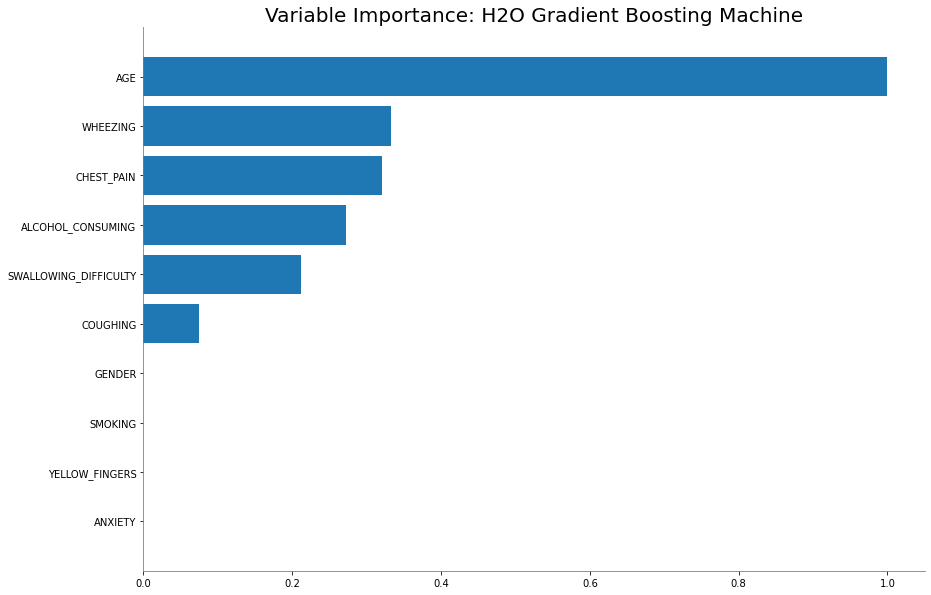

<Figure size 36000x7200 with 0 Axes>

In [40]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

18
glm


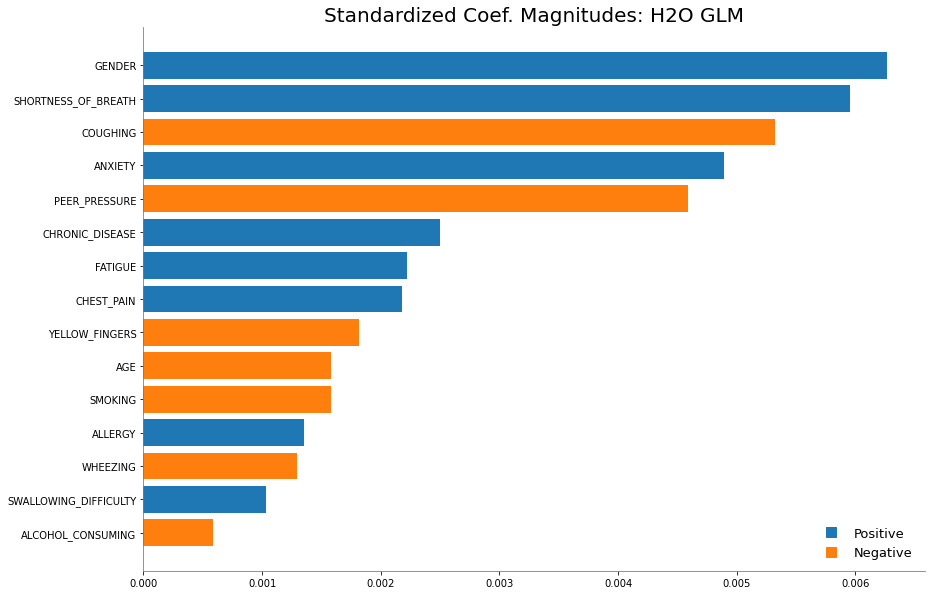

In [41]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [42]:
print(best_model.auc(train = True))

0.576582440561056


In [43]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [44]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.503250464583134,
 'gini': 0.006500929166268099,
 'logloss': 0.693316339085778,
 'mse': 0.2500852238458957,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.5000852165840295}

In [45]:
!pip install shap

     |████████████████████████████████| 564 kB 5.5 MB/s 


4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans: 

1. After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'PEER_PRESSURE' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'ALLERGY' is the least important feature. According to beeswarm plot, higher value of 'PEER_PRESSURE' (2) leads to lower chance of lung cancer. Lower value of 'PEER_PRESSURE' (1) leads to higher chance of lung cancer. Similarly, COUGHING, YELLOW_FINGERS, AGE, SMOKING, ALCOHOL_CONSUMING, ALLERGY have negative impact on output. While, CHEST_PAIN, GENDER, ANXIETY, CHRONIC_DISEASE, SWALLOWING_DIFFICULTY, WHEEZING, FATIGUE, SHORTNESS_OF_BREATH have positive impact on model output.

2. For model 2 (i.e. XGBoost), 'AGE' and 'SHORTNESS_OF_BREATH' are the most and least significant features respectively contributing towards prediction of lung cancer. According to summary plot, higher value of 'AGE' leads to lower chance of lung cancer. Lower value of 'AGE' leads to higher chance of lung cancer.

3. As per model 3 (i.e. GBM), by referring the above shap summary plot, 'AGE' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'GENDER' is less important.

So, all 3 algorithms shows different results. We can perform regularization to make the model better.



In [46]:
import shap

# SHAP analysis for Linear model (Logistic Regression)

In [47]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

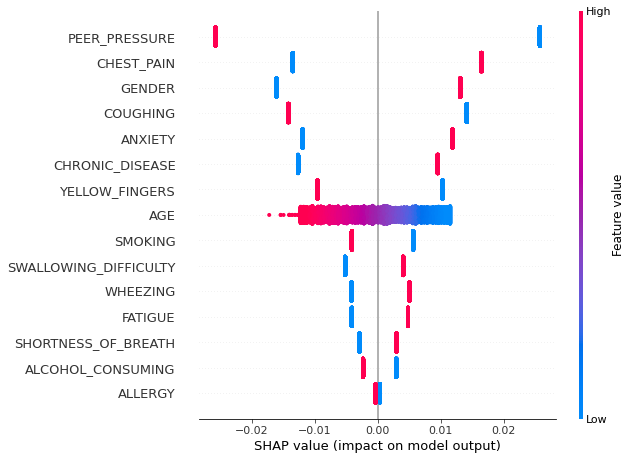

In [48]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

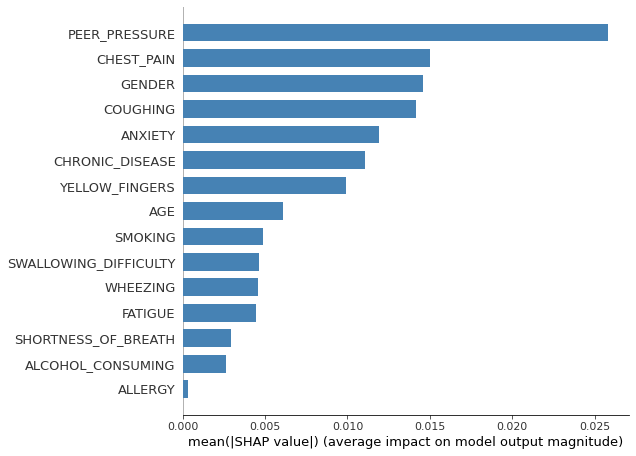

In [49]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

# SHAP analysis for Tree based model (XGBoost)

In [50]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

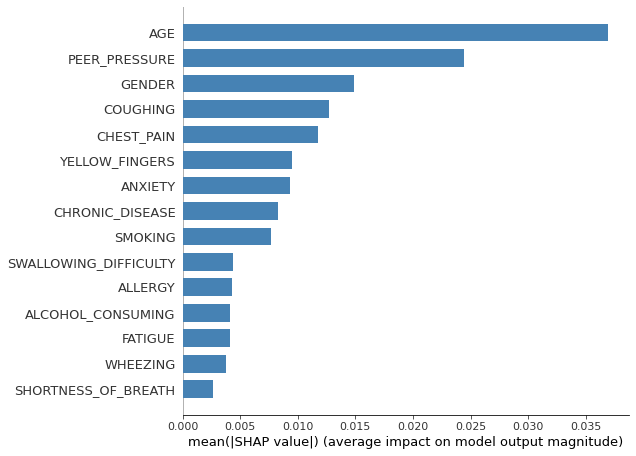

In [51]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

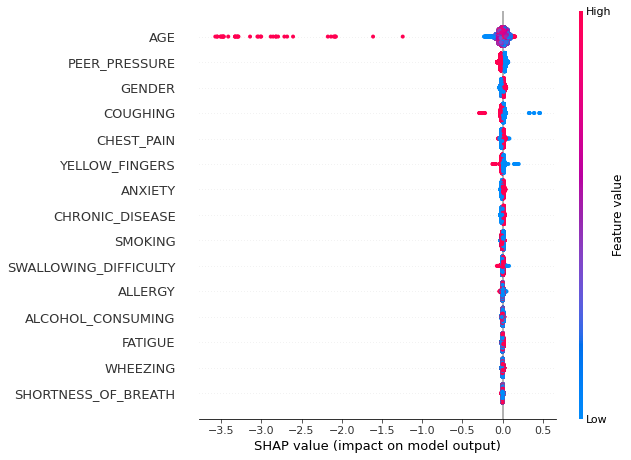

In [52]:
shap.summary_plot(shap_values, x_train)

**References:**

https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

https://www.datacamp.com/community/tutorials/xgboost-in-python

**Conclusion:**

Build a predictive model using Logistic regression, XGBoost, AutoML to predict whether a patient has lung cancer based on a set of risk factors. Model interpretability was tested using shap analysis by plotting beeswarm and shap summary plots to compare all three models. We discovered that all three algorithms produce distinct outcomes, and that regularization can be used to improve the models.